<a href="https://colab.research.google.com/github/nsk31512/terver/blob/hometask2/%D0%A2%D0%B5%D1%80%D0%B2%D0%B5%D1%80_%D0%94%D0%B72.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задачи 1 и 2
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Случайная величина X задаёт число правильных ответов при простом угадывании. Найдите математическое ожидание данной случайной величины. Найдите дисперсию случайной величины X.

Подсказка: постройте закон распределения случайной величины X.

In [124]:
import numpy as np
import matplotlib.pyplot as plt

In [125]:
def combination(n, k):
  #функция Сочетания

  A_n_k = np.math.factorial(n)
  P_k = np.math.factorial(k)*np.math.factorial(n-k)
  return A_n_k//P_k  

Принимаемые значения случайной величины $x_1=0, x_2=1, x_3=2, x_4=3, x_5=4, x_6=5$

In [126]:
#всего вопросов
num_of_questions = 4*5
num_of_questions

20

In [127]:
#общее число способов дать ответ на вопрос
C4_20 = combination(20, 5)
C4_20

15504

In [128]:
x_list = np.array([el for el in range(6)])
#Рассчитаем вероятности дать правильный ответ и сведем ответы в словарь
probabilities = []
for i in x_list:
  P_i = combination(5, i)*combination(15, 15-i)/C4_20
  probabilities.append(P_i)
probabilities = np.array(probabilities)
probabilities

array([6.44994840e-05, 4.83746130e-03, 6.77244582e-02, 2.93472652e-01,
       4.40208978e-01, 1.93691950e-01])

In [129]:
#Рассчитаем мат.ожидание
M_X = (x_list * probabilities).sum()
M_X

3.7499999999999996

In [130]:
M_X = 3.75

рассчитаем дисперсию

In [131]:
y_values = x_list - M_X
y_values

array([-3.75, -2.75, -1.75, -0.75,  0.25,  1.25])

In [132]:
z_values = y_values ** 2
z_values

array([14.0625,  7.5625,  3.0625,  0.5625,  0.0625,  1.5625])

In [133]:
D_X = (z_values * probabilities).sum()
D_X

0.7401315789473684

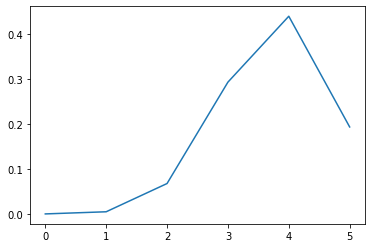

In [134]:
plt.plot(probabilities)

# Задача 3
Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [135]:
def poisson_proba(k: int, lambda_: float):
  return (lambda_ ** k) * (np.exp(-lambda_)) / np.math.factorial(k)


In [136]:
#Применим формулу Пуассона
P_10 = poisson_proba(10, 10)
P_10

0.1251100357211333

Таким образом, вероятность получить ровно 10 писем со спамом составляет 0,125...


In [137]:
sum_of_p = 0
count_of_letters = 0
while True:  
  P_i = poisson_proba(count_of_letters, 10)
  sum_of_p += P_i  
  if sum_of_p >= 0.95:    
    break
  count_of_letters += 1
count_of_letters

15

In [138]:
#проверка
print(poisson_proba(15, 10))
print(poisson_proba(14, 10))

0.03471806963068413
0.05207710444602619


Получается, что с вероятностью 95% пользователь получит не более 15 писем

# Задача 4
Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка: 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

Параметр лямбда в распределении Пуассона при p=0.01 равен 1(n=100).

In [139]:
poisson_proba(6, 1)


0.0005109436682936699

In [140]:
combination(1, 1)*(0.01 ** 1) * ((1-0.01)**(1 - 1))  


0.01

In [141]:
combination(100, 6)

1192052400

In [152]:
#Вероятность попадания меньше 6 раз должна быть менее 0,1
P_less_6 = 1

total_shots = 1
while True:
  for i in range(1, total_shots+1): #счетчик попаданий в цель
    P_less_6 -= combination(total_shots, i)*(0.01 ** i) * ((1-0.01)**(total_shots - i))
    total_shots += 1
    if P_less_6 <= 0.1:
      break
  if P_less_6 <= 0.1:
    break
P_less_6, total_shots

(0.08444548982373451, 65)

Таким образом, после 65 выстрелов можно с вероятностью 0,9 сказать, что стрелок попадет хотя бы 6 раз